In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [2]:
import Atools as Atools
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.stats import pearsonr
from datetime import datetime
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib import gridspec
from scipy import stats
def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended

def is_jfm(month):
    return (month>=1) & (month<=3)

def is_fma(month):
    return (month>=2) & (month<=4)

def is_mam(month):
    return (month>=3) & (month<=5)

def is_amj(month):
    return (month>=4) & (month<=6)

def is_mjj(month):
    return (month>=5) & (month<=7)

def is_jja(month):
    return (month>=6) & (month<=8)

def is_jas(month):
    return (month>=7) & (month<=9)

def is_aso(month):
    return (month>=8) & (month<=10)

def is_son(month):
    return (month>=9) & (month<=11)

def is_ond(month):
    return (month>=10) & (month<=12)

def is_ndj(month):
    return (month==11)|(month==12)|(month==1)

def is_djf(month):
    return (month==12)|(month==1)|(month==2)


def plot_regress_map(ax,ssta_detrended_std,levels,cmap):
    ftz=15
    
    p0=ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.alpha,
                      cmap=cmap,transform=ccrs.PlateCarree(),levels=levels,extend='both')
    #ax.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
    #                                    alpha=1,linewidth=3,label='ATL3'))
    c1b = ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,
                      ssta_detrended_std.pval,[np.min(ssta_detrended_std.pval),0.05,np.max(ssta_detrended_std.pval)],
                      zorder=2,
                          hatches=['.', None],colors="none", transform=ccrs.PlateCarree())
    CS = ax.contour(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.rval**2,
                      colors='black',transform=ccrs.PlateCarree(),levels=[0.4,0.6,0.8])
    ax.clabel(CS, inline=1, fontsize=10,zorder=2)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='-',zorder=3)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': ftz, 'color': 'black'}
    gl.ylabel_style = {'size': ftz, 'color': 'black'}
    gl.xlocator = mticker.FixedLocator([-40,-20, 0,20])
    gl.ylocator = mticker.FixedLocator([-20,-10, 0,10,20])
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
    #ax0.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
    ax.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
    #ax[i].add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
    #ax.set_title(ssta_detrended_std.model.values,fontsize=ftz)
    return p0




def plot_regress_map_diff(ax,ssta_detrended_std,levels,cmap):
    ftz=15
    
    p0=ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.alpha,
                      cmap=cmap,transform=ccrs.PlateCarree(),levels=levels,extend='both')
    #ax.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
    #                                    alpha=1,linewidth=3,label='ATL3'))

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='-',zorder=3)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': ftz, 'color': 'black'}
    gl.ylabel_style = {'size': ftz, 'color': 'black'}
    gl.xlocator = mticker.FixedLocator([-40,-20, 0,20])
    gl.ylocator = mticker.FixedLocator([-20,-10, 0,10,20])
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
    #ax0.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
    ax.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
    #ax[i].add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
    #ax.set_title(ssta_detrended_std.model.values,fontsize=ftz)
    return p0


In [3]:
dir_data1 = '/work/bb1153/b381638/ICON/ngc2013/'
dir_data2 = '/work/bb1153/b381638/ICON/rthk001/'

dir_ind = '/work/bb1153/b381602/ICON/indices/'
dir_ind2 = '/work/bb1153/b381602/ICON/'

# Load data and take the common time period

In [4]:

data_ngc2013_sst = xr.open_dataset(dir_data1+'ts_ngc2013_grid01x01_20200201-20500131_monmean.nc')
data_rthk001_sst = xr.open_dataset(dir_data2+'ts_rthk001_grid01x01_20200201-20500131_monmean.nc')


data_ngc2013 = xr.open_dataset(dir_data1+'zos_ngc2013_grid01x01_20200201-20500131_monmean.nc')
data_rthk001 = xr.open_dataset(dir_data2+'zos_rthk001_grid01x01_20200201-20500131_monmean.nc')



data_ngc2013_new = xr.concat([data_ngc2013.zos[:,:,180:],data_ngc2013.zos[:,:,:180]],dim = 'lon') 
data_ngc2013_new.coords['lon'] = (data_ngc2013_new.coords['lon'] + 180)%360 - 180


data_rthk001_new = xr.concat([data_rthk001.zos[:,:,180:],data_rthk001.zos[:,:,:180]],dim = 'lon') 
data_rthk001_new.coords['lon'] = (data_rthk001_new.coords['lon'] + 180)%360 - 180



data_ngc2013_sst_new = xr.concat([data_ngc2013_sst.ts[:,:,180:],data_ngc2013_sst.ts[:,:,:180]],dim = 'lon') 
data_ngc2013_sst_new.coords['lon'] = (data_ngc2013_sst_new.coords['lon'] + 180)%360 - 180


data_rthk001_sst_new = xr.concat([data_rthk001_sst.ts[:,:,180:],data_rthk001_sst.ts[:,:,:180]],dim = 'lon') 
data_rthk001_sst_new.coords['lon'] = (data_rthk001_sst_new.coords['lon'] + 180)%360 - 180




zos_1 = data_ngc2013_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))
zos_2 = data_rthk001_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))





sst_1 = data_ngc2013_sst_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))
sst_2 = data_rthk001_sst_new.sel(time = slice(datetime(2021, 1, 1), datetime(2049, 12, 31)))

In [5]:
sst_atl_1 = Atools.data_sub(sst_1,-45,20,-30,10)
sst_atl_2 = Atools.data_sub(sst_2,-45,20,-30,10)

zos_atl_1 = Atools.data_sub(zos_1,-45,20,-30,10)
zos_atl_2 = Atools.data_sub(zos_2,-45,20,-30,10)

# Linearly detrend

In [6]:
sst_atl_dtd_1 = np.ones((sst_atl_1.shape[0],sst_atl_1.shape[1],sst_atl_1.shape[2]))*np.nan
xdata_1 = np.arange(0,sst_atl_1.time.shape[0],1)
ydata_1_tmp = np.array(sst_atl_1)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            sst_atl_dtd_1[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

sst_detrended_atl_1 = xr.Dataset({'sst': (['time','lat','lon'], sst_atl_dtd_1),
                               },
                      coords={
                              'time': np.array(sst_atl_1.time),
                              'lat': np.array(sst_atl_1.lat),
                              'lon':np.array(sst_atl_1.lon)})



sst_atl_dtd_2 = np.ones((sst_atl_2.shape[0],sst_atl_2.shape[1],sst_atl_2.shape[2]))*np.nan
xdata_1 = np.arange(0,sst_atl_2.time.shape[0],1)
ydata_1_tmp = np.array(sst_atl_2)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            sst_atl_dtd_2[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

sst_detrended_atl_2 = xr.Dataset({'sst': (['time','lat','lon'], sst_atl_dtd_2),
                               },
                      coords={
                              'time': np.array(sst_atl_2.time),
                              'lat': np.array(sst_atl_2.lat),
                              'lon':np.array(sst_atl_2.lon)})






zos_atl_dtd_1 = np.ones((zos_atl_1.shape[0],zos_atl_1.shape[1],zos_atl_1.shape[2]))*np.nan
xdata_1 = np.arange(0,zos_atl_1.time.shape[0],1)
ydata_1_tmp = np.array(zos_atl_1)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            zos_atl_dtd_1[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

zos_detrended_atl_1 = xr.Dataset({'zos': (['time','lat','lon'], zos_atl_dtd_1),
                               },
                      coords={
                              'time': np.array(zos_atl_1.time),
                              'lat': np.array(zos_atl_1.lat),
                              'lon':np.array(zos_atl_1.lon)})



zos_atl_dtd_2 = np.ones((zos_atl_2.shape[0],zos_atl_2.shape[1],zos_atl_2.shape[2]))*np.nan
xdata_1 = np.arange(0,zos_atl_2.time.shape[0],1)
ydata_1_tmp = np.array(zos_atl_2)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            zos_atl_dtd_2[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

zos_detrended_atl_2 = xr.Dataset({'zos': (['time','lat','lon'], zos_atl_dtd_2),
                               },
                      coords={
                              'time': np.array(zos_atl_2.time),
                              'lat': np.array(zos_atl_2.lat),
                              'lon':np.array(zos_atl_2.lon)})


# Compute sst anomalies

In [7]:
ssta_1,_ = Atools.ano_norm_t(sst_detrended_atl_1.sst)
ssta_2,_ = Atools.ano_norm_t(sst_detrended_atl_2.sst)


zosa_1,_ = Atools.ano_norm_t(zos_detrended_atl_1.zos)
zosa_2,_ = Atools.ano_norm_t(zos_detrended_atl_2.zos)


/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:95: RuntimeWarning: invalid value encountered in divide
  ano_norm = xr.apply_ufunc(lambda x, m, s: (x - m) / s,
/home/b/b382431/Atools.py:9

In [14]:
zosa_1_jja = zosa_1.sel(time=is_jja(zosa_1['time.month'])).groupby('time.year').mean()
zosa_2_jja = zosa_2.sel(time=is_jja(zosa_2['time.month'])).groupby('time.year').mean()


ssta_1_jja = ssta_1.sel(time=is_jja(ssta_1['time.month'])).groupby('time.year').mean()
ssta_2_jja = ssta_2.sel(time=is_jja(ssta_2['time.month'])).groupby('time.year').mean()




zosa_1_ond = zosa_1.sel(time=is_ond(zosa_1['time.month'])).groupby('time.year').mean()
zosa_2_ond = zosa_2.sel(time=is_ond(zosa_2['time.month'])).groupby('time.year').mean()


ssta_1_ond = ssta_1.sel(time=is_ond(ssta_1['time.month'])).groupby('time.year').mean()
ssta_2_ond = ssta_2.sel(time=is_ond(ssta_2['time.month'])).groupby('time.year').mean()





In [15]:
#zosa_1_jja.to_netcdf('data/zosa_ngc2013_jja.nc')
#zosa_2_jja.to_netcdf('data/zosa_rthk001_jja.nc')


zosa_1_ond.to_netcdf('data/zosa_ngc2013_ond.nc')
zosa_2_ond.to_netcdf('data/zosa_rthk001_ond.nc')

In [11]:
def regress_xy(x,y):

    alpha = np.ones((y.shape[1],y.shape[2]))*np.nan
    rval = np.ones((y.shape[1],y.shape[2]))*np.nan
    pval = np.ones((y.shape[1],y.shape[2]))*np.nan
    for i in range(alpha.shape[0]):
        for j in range(alpha.shape[1]):
            if x[0,i,j]!=0:
                alpha[i,j], _ , rval[i,j],pval[i,j],_ = stats.linregress(x[:,i,j],y[:,i,j])
            
    regression = xr.Dataset({'alpha': (['lat','lon'], alpha),
                             'rval': (['lat','lon'], rval),
                             'pval': (['lat','lon'], pval),
                               },
                      coords={
                              
                              'lat': np.array(y.lat),
                              'lon':np.array(y.lon)})
            
    return regression

In [12]:
bf3_1 = regress_xy(zosa_1_jja,ssta_1_jja)
bf3_2 = regress_xy(zosa_2_jja,ssta_2_jja)



bf3_1_ond = regress_xy(zosa_1_ond,ssta_1_ond)
bf3_2_ond = regress_xy(zosa_2_ond,ssta_2_ond)

In [13]:
#bf3_1.to_netcdf('data/bf3_thin.nc')
#bf3_2.to_netcdf('data/bf3_thick.nc')



bf3_1_ond.to_netcdf('data/bf3_thin_ond.nc')
bf3_2_ond.to_netcdf('data/bf3_thick_ond.nc')

# figures

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487

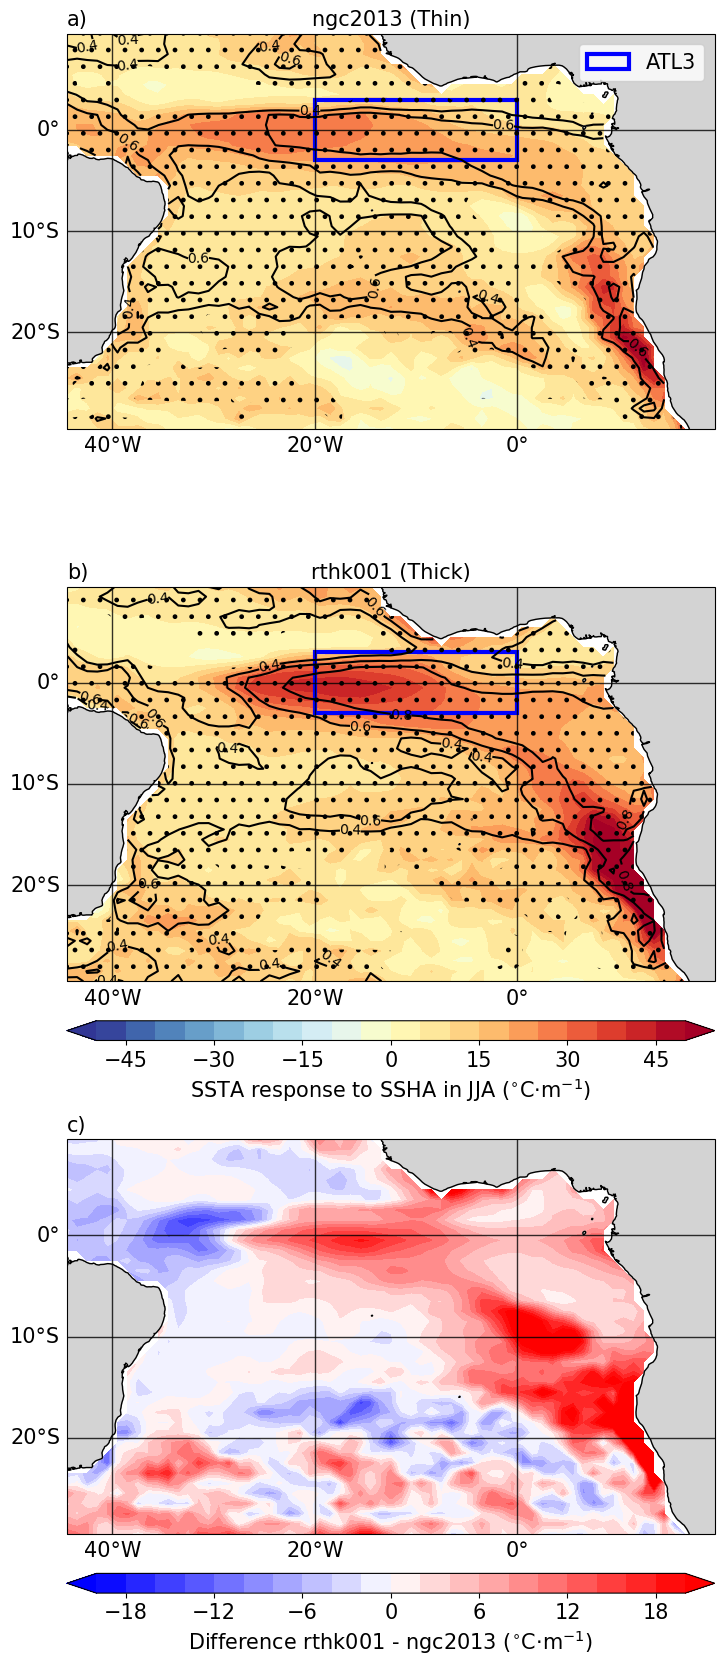

In [10]:
ftz=15


fig = plt.figure(figsize=[10, 15])
fig.patch.set_facecolor('white')
gs = gridspec.GridSpec(3, 1)



ax0  = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax1  = fig.add_subplot(gs[1, 0],projection=ccrs.PlateCarree())
ax2  = fig.add_subplot(gs[2, 0],projection=ccrs.PlateCarree())


cax0 = inset_axes(ax1,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.15, 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0,
                   )

cax2 = inset_axes(ax2,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.15, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )


plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.4
                    ,
                    wspace=0.2) 



levels=np.arange(-50,55,5)

levels1=np.arange(-20,22,2)
cmap = plt.cm.RdYlBu_r

cmap1 = plt.cm.bwr

p0=plot_regress_map(ax0,bf3_1,levels=levels,cmap=cmap)
p1=plot_regress_map(ax1,bf3_2,levels=levels,cmap=cmap)


p2=plot_regress_map_diff(ax2,bf3_2 - bf3_1,levels=levels1,cmap=cmap1)
ax0.set_title('ngc2013 (Thin)',fontsize=ftz)
ax1.set_title('rthk001 (Thick)',fontsize=ftz)


ax0.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
                                    alpha=1,linewidth=3,label='ATL3',transform=ccrs.PlateCarree()))
ax0.legend(fontsize=ftz)
ax1.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
                                    alpha=1,linewidth=3,label='ATL3',transform=ccrs.PlateCarree()))



cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'SSTA response to SSHA in JJA ($^{\circ}$C$\cdot$m$^{-1}$)', size=ftz)




cbar = plt.colorbar(p2,cax2,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'Difference rthk001 - ngc2013 ($^{\circ}$C$\cdot$m$^{-1}$)', size=ftz)


ax0.text(0,
         1.02, 'a)',transform=ax0.transAxes,size=ftz)
ax1.text(0,
         1.02, 'b)',transform=ax1.transAxes,size=ftz)
ax2.text(0,
         1.02, 'c)',transform=ax2.transAxes,size=ftz)


plt.savefig('figures/figure_BF3_atl_JJA.png',
             dpi = 300,
            bbox_inches='tight')

# compute seasonal cycle of std ssta

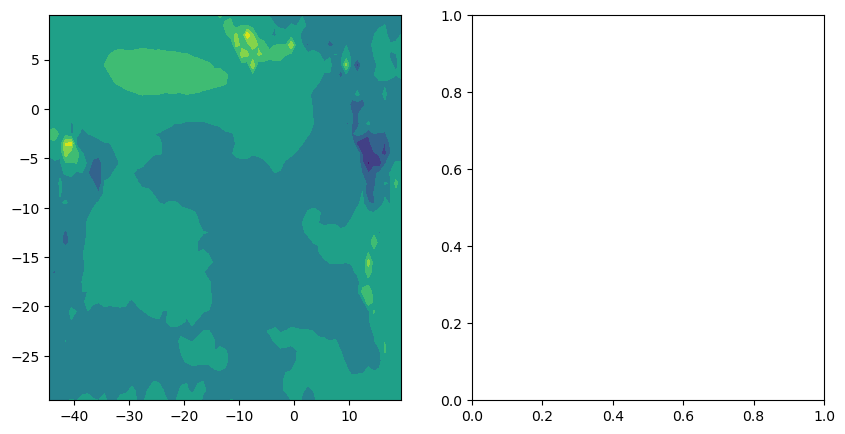

In [19]:
f,ax = plt.subplots(1,2,figsize=[10,5])

ax=ax.ravel()

ax[0].contourf(bf1_1.lon,bf1_1.lat,bf1_1.alpha )

# Compute cross correlation

In [61]:

ssta_1_jja = ssta_1.sel(time=is_jja(ssta_1['time.month']))
ssta_2_jja = ssta_2.sel(time=is_jja(ssta_2['time.month']))


zosa_1_jja = zosa_1.sel(time=is_jja(zosa_1['time.month']))
zosa_2_jja = zosa_2.sel(time=is_jja(zosa_2['time.month']))






tauua_1_jfm = tauua_1.sel(time=is_jfm(tauua_1['time.month']))
tauua_1_fma = tauua_1.sel(time=is_fma(tauua_1['time.month']))
tauua_1_mam = tauua_1.sel(time=is_mam(tauua_1['time.month']))
tauua_1_amj = tauua_1.sel(time=is_amj(tauua_1['time.month']))
tauua_1_mjj = tauua_1.sel(time=is_mjj(tauua_1['time.month']))
tauua_1_jja = tauua_1.sel(time=is_jja(tauua_1['time.month']))
tauua_1_jas = tauua_1.sel(time=is_jas(tauua_1['time.month']))
tauua_1_aso = tauua_1.sel(time=is_aso(tauua_1['time.month']))
tauua_1_son = tauua_1.sel(time=is_son(tauua_1['time.month']))
tauua_1_ond = tauua_1.sel(time=is_ond(tauua_1['time.month']))
tauua_1_ndj = tauua_1.sel(time=is_ndj(tauua_1['time.month']))
tauua_1_djf = tauua_1.sel(time=is_djf(tauua_1['time.month']))


tauua_2_jfm = tauua_2.sel(time=is_jfm(tauua_2['time.month']))
tauua_2_fma = tauua_2.sel(time=is_fma(tauua_2['time.month']))
tauua_2_mam = tauua_2.sel(time=is_mam(tauua_2['time.month']))
tauua_2_amj = tauua_2.sel(time=is_amj(tauua_2['time.month']))
tauua_2_mjj = tauua_2.sel(time=is_mjj(tauua_2['time.month']))
tauua_2_jja = tauua_2.sel(time=is_jja(tauua_2['time.month']))
tauua_2_jas = tauua_2.sel(time=is_jas(tauua_2['time.month']))
tauua_2_aso = tauua_2.sel(time=is_aso(tauua_2['time.month']))
tauua_2_son = tauua_2.sel(time=is_son(tauua_2['time.month']))
tauua_2_ond = tauua_2.sel(time=is_ond(tauua_2['time.month']))
tauua_2_ndj = tauua_2.sel(time=is_ndj(tauua_2['time.month']))
tauua_2_djf = tauua_2.sel(time=is_djf(tauua_2['time.month']))




zosa_1_jfm = zosa_1.sel(time=is_jfm(zosa_1['time.month']))
zosa_1_fma = zosa_1.sel(time=is_fma(zosa_1['time.month']))
zosa_1_mam = zosa_1.sel(time=is_mam(zosa_1['time.month']))
zosa_1_amj = zosa_1.sel(time=is_amj(zosa_1['time.month']))
zosa_1_mjj = zosa_1.sel(time=is_mjj(zosa_1['time.month']))
zosa_1_jja = zosa_1.sel(time=is_jja(zosa_1['time.month']))
zosa_1_jas = zosa_1.sel(time=is_jas(zosa_1['time.month']))
zosa_1_aso = zosa_1.sel(time=is_aso(zosa_1['time.month']))
zosa_1_son = zosa_1.sel(time=is_son(zosa_1['time.month']))
zosa_1_ond = zosa_1.sel(time=is_ond(zosa_1['time.month']))
zosa_1_ndj = zosa_1.sel(time=is_ndj(zosa_1['time.month']))
zosa_1_djf = zosa_1.sel(time=is_djf(zosa_1['time.month']))


zosa_2_jfm = zosa_2.sel(time=is_jfm(zosa_2['time.month']))
zosa_2_fma = zosa_2.sel(time=is_fma(zosa_2['time.month']))
zosa_2_mam = zosa_2.sel(time=is_mam(zosa_2['time.month']))
zosa_2_amj = zosa_2.sel(time=is_amj(zosa_2['time.month']))
zosa_2_mjj = zosa_2.sel(time=is_mjj(zosa_2['time.month']))
zosa_2_jja = zosa_2.sel(time=is_jja(zosa_2['time.month']))
zosa_2_jas = zosa_2.sel(time=is_jas(zosa_2['time.month']))
zosa_2_aso = zosa_2.sel(time=is_aso(zosa_2['time.month']))
zosa_2_son = zosa_2.sel(time=is_son(zosa_2['time.month']))
zosa_2_ond = zosa_2.sel(time=is_ond(zosa_2['time.month']))
zosa_2_ndj = zosa_2.sel(time=is_ndj(zosa_2['time.month']))
zosa_2_djf = zosa_2.sel(time=is_djf(zosa_2['time.month']))







In [62]:

ssta_1_jja_mean = ssta_1_jja.groupby('time.year').mean()
ssta_2_jja_mean = ssta_2_jja.groupby('time.year').mean()


zosa_1_jja_mean = zosa_1_jja.groupby('time.year').mean()
zosa_2_jja_mean = zosa_2_jja.groupby('time.year').mean()



tauua_1_jfm_mean = tauua_1_jfm.groupby('time.year').mean()
tauua_1_fma_mean = tauua_1_fma.groupby('time.year').mean()
tauua_1_mam_mean = tauua_1_mam.groupby('time.year').mean()
tauua_1_amj_mean = tauua_1_amj.groupby('time.year').mean()
tauua_1_mjj_mean = tauua_1_mjj.groupby('time.year').mean()
tauua_1_jja_mean = tauua_1_jja.groupby('time.year').mean()
tauua_1_jas_mean = tauua_1_jas.groupby('time.year').mean()
tauua_1_aso_mean = tauua_1_aso.groupby('time.year').mean()
tauua_1_son_mean = tauua_1_son.groupby('time.year').mean()
tauua_1_ond_mean = tauua_1_ond.groupby('time.year').mean()
tauua_1_djf_mean_tmp = tauua_1_djf.rolling(min_periods=3, center=True, time=3).mean()
tauua_1_djf_mean = tauua_1_djf_mean_tmp.where(tauua_1_djf_mean_tmp['time.month']==1,drop=True)
tauua_1_ndj_mean_tmp = tauua_1_ndj.rolling(min_periods=3, center=True, time=3).mean()
tauua_1_ndj_mean = tauua_1_ndj_mean_tmp.where(tauua_1_ndj_mean_tmp['time.month']==12,drop=True)



tauua_2_jfm_mean = tauua_2_jfm.groupby('time.year').mean()
tauua_2_fma_mean = tauua_2_fma.groupby('time.year').mean()
tauua_2_mam_mean = tauua_2_mam.groupby('time.year').mean()
tauua_2_amj_mean = tauua_2_amj.groupby('time.year').mean()
tauua_2_mjj_mean = tauua_2_mjj.groupby('time.year').mean()
tauua_2_jja_mean = tauua_2_jja.groupby('time.year').mean()
tauua_2_jas_mean = tauua_2_jas.groupby('time.year').mean()
tauua_2_aso_mean = tauua_2_aso.groupby('time.year').mean()
tauua_2_son_mean = tauua_2_son.groupby('time.year').mean()
tauua_2_ond_mean = tauua_2_ond.groupby('time.year').mean()
tauua_2_djf_mean_tmp = tauua_2_djf.rolling(min_periods=3, center=True, time=3).mean()
tauua_2_djf_mean = tauua_2_djf_mean_tmp.where(tauua_2_djf_mean_tmp['time.month']==1,drop=True)
tauua_2_ndj_mean_tmp = tauua_2_ndj.rolling(min_periods=3, center=True, time=3).mean()
tauua_2_ndj_mean = tauua_2_ndj_mean_tmp.where(tauua_2_ndj_mean_tmp['time.month']==12,drop=True)







zosa_1_jfm_mean = zosa_1_jfm.groupby('time.year').mean()
zosa_1_fma_mean = zosa_1_fma.groupby('time.year').mean()
zosa_1_mam_mean = zosa_1_mam.groupby('time.year').mean()
zosa_1_amj_mean = zosa_1_amj.groupby('time.year').mean()
zosa_1_mjj_mean = zosa_1_mjj.groupby('time.year').mean()
zosa_1_jja_mean = zosa_1_jja.groupby('time.year').mean()
zosa_1_jas_mean = zosa_1_jas.groupby('time.year').mean()
zosa_1_aso_mean = zosa_1_aso.groupby('time.year').mean()
zosa_1_son_mean = zosa_1_son.groupby('time.year').mean()
zosa_1_ond_mean = zosa_1_ond.groupby('time.year').mean()
zosa_1_djf_mean_tmp = zosa_1_djf.rolling(min_periods=3, center=True, time=3).mean()
zosa_1_djf_mean = zosa_1_djf_mean_tmp.where(zosa_1_djf_mean_tmp['time.month']==1,drop=True)
zosa_1_ndj_mean_tmp = zosa_1_ndj.rolling(min_periods=3, center=True, time=3).mean()
zosa_1_ndj_mean = zosa_1_ndj_mean_tmp.where(zosa_1_ndj_mean_tmp['time.month']==12,drop=True)



zosa_2_jfm_mean = zosa_2_jfm.groupby('time.year').mean()
zosa_2_fma_mean = zosa_2_fma.groupby('time.year').mean()
zosa_2_mam_mean = zosa_2_mam.groupby('time.year').mean()
zosa_2_amj_mean = zosa_2_amj.groupby('time.year').mean()
zosa_2_mjj_mean = zosa_2_mjj.groupby('time.year').mean()
zosa_2_jja_mean = zosa_2_jja.groupby('time.year').mean()
zosa_2_jas_mean = zosa_2_jas.groupby('time.year').mean()
zosa_2_aso_mean = zosa_2_aso.groupby('time.year').mean()
zosa_2_son_mean = zosa_2_son.groupby('time.year').mean()
zosa_2_ond_mean = zosa_2_ond.groupby('time.year').mean()
zosa_2_djf_mean_tmp = zosa_2_djf.rolling(min_periods=3, center=True, time=3).mean()
zosa_2_djf_mean = zosa_2_djf_mean_tmp.where(zosa_2_djf_mean_tmp['time.month']==1,drop=True)
zosa_2_ndj_mean_tmp = zosa_2_ndj.rolling(min_periods=3, center=True, time=3).mean()
zosa_2_ndj_mean = zosa_2_ndj_mean_tmp.where(zosa_2_ndj_mean_tmp['time.month']==12,drop=True)

In [66]:
corr_uas_ssta_1 = np.ones((13))*np.nan
pval_uas_ssta_1 = np.ones((13))*np.nan
                        
                        
corr_uas_ssta_2 = np.ones((13))*np.nan
pval_uas_ssta_2 = np.ones((13))*np.nan
                        

    
    
corr_uas_zosa_1 = np.ones((13))*np.nan
pval_uas_zosa_1 = np.ones((13))*np.nan
                        
                        
corr_uas_zosa_2 = np.ones((13))*np.nan
pval_uas_zosa_2 = np.ones((13))*np.nan
   
    
corr_ssta_zosa_1 = np.ones((13))*np.nan
pval_ssta_zosa_1 = np.ones((13))*np.nan
                        
                        
corr_ssta_zosa_2 = np.ones((13))*np.nan
pval_ssta_zosa_2 = np.ones((13))*np.nan
   
   

In [67]:
corr_uas_ssta_1[0],pval_uas_ssta_1[0] = pearsonr(tauua_1_djf_mean[1:],ssta_1_jja_mean[1:])
corr_uas_ssta_1[1],pval_uas_ssta_1[1] = pearsonr(tauua_1_jfm_mean,ssta_1_jja_mean)
corr_uas_ssta_1[2],pval_uas_ssta_1[2] = pearsonr(tauua_1_fma_mean,ssta_1_jja_mean)
corr_uas_ssta_1[3],pval_uas_ssta_1[3] = pearsonr(tauua_1_mam_mean,ssta_1_jja_mean)
corr_uas_ssta_1[4],pval_uas_ssta_1[4] = pearsonr(tauua_1_amj_mean,ssta_1_jja_mean)
corr_uas_ssta_1[5],pval_uas_ssta_1[5] = pearsonr(tauua_1_mjj_mean,ssta_1_jja_mean)
corr_uas_ssta_1[6],pval_uas_ssta_1[6] = pearsonr(tauua_1_jja_mean,ssta_1_jja_mean)
corr_uas_ssta_1[7],pval_uas_ssta_1[7] = pearsonr(tauua_1_jas_mean,ssta_1_jja_mean)
corr_uas_ssta_1[8],pval_uas_ssta_1[8] = pearsonr(tauua_1_aso_mean,ssta_1_jja_mean)
corr_uas_ssta_1[9],pval_uas_ssta_1[9] = pearsonr(tauua_1_son_mean,ssta_1_jja_mean)
corr_uas_ssta_1[10],pval_uas_ssta_1[10] = pearsonr(tauua_1_ond_mean,ssta_1_jja_mean)
corr_uas_ssta_1[11],pval_uas_ssta_1[11] = pearsonr(tauua_1_ndj_mean[:-1],ssta_1_jja_mean[:-1])
corr_uas_ssta_1[12],pval_uas_ssta_1[12] = pearsonr(tauua_1_djf_mean[1:],ssta_1_jja_mean[:-1])



corr_uas_ssta_2[0],pval_uas_ssta_2[0] = pearsonr(tauua_2_djf_mean[1:],ssta_2_jja_mean[1:])
corr_uas_ssta_2[1],pval_uas_ssta_2[1] = pearsonr(tauua_2_jfm_mean,ssta_2_jja_mean)
corr_uas_ssta_2[2],pval_uas_ssta_2[2] = pearsonr(tauua_2_fma_mean,ssta_2_jja_mean)
corr_uas_ssta_2[3],pval_uas_ssta_2[3] = pearsonr(tauua_2_mam_mean,ssta_2_jja_mean)
corr_uas_ssta_2[4],pval_uas_ssta_2[4] = pearsonr(tauua_2_amj_mean,ssta_2_jja_mean)
corr_uas_ssta_2[5],pval_uas_ssta_2[5] = pearsonr(tauua_2_mjj_mean,ssta_2_jja_mean)
corr_uas_ssta_2[6],pval_uas_ssta_2[6] = pearsonr(tauua_2_jja_mean,ssta_2_jja_mean)
corr_uas_ssta_2[7],pval_uas_ssta_2[7] = pearsonr(tauua_2_jas_mean,ssta_2_jja_mean)
corr_uas_ssta_2[8],pval_uas_ssta_2[8] = pearsonr(tauua_2_aso_mean,ssta_2_jja_mean)
corr_uas_ssta_2[9],pval_uas_ssta_2[9] = pearsonr(tauua_2_son_mean,ssta_2_jja_mean)
corr_uas_ssta_2[10],pval_uas_ssta_2[10] = pearsonr(tauua_2_ond_mean,ssta_2_jja_mean)
corr_uas_ssta_2[11],pval_uas_ssta_2[11] = pearsonr(tauua_2_ndj_mean[:-1],ssta_2_jja_mean[:-1])
corr_uas_ssta_2[12],pval_uas_ssta_2[12] = pearsonr(tauua_2_djf_mean[1:],ssta_2_jja_mean[:-1])

In [68]:
corr_uas_zosa_1[0],pval_uas_zosa_1[0] = pearsonr(tauua_1_djf_mean[1:],zosa_1_jja_mean[1:])
corr_uas_zosa_1[1],pval_uas_zosa_1[1] = pearsonr(tauua_1_jfm_mean,zosa_1_jja_mean)
corr_uas_zosa_1[2],pval_uas_zosa_1[2] = pearsonr(tauua_1_fma_mean,zosa_1_jja_mean)
corr_uas_zosa_1[3],pval_uas_zosa_1[3] = pearsonr(tauua_1_mam_mean,zosa_1_jja_mean)
corr_uas_zosa_1[4],pval_uas_zosa_1[4] = pearsonr(tauua_1_amj_mean,zosa_1_jja_mean)
corr_uas_zosa_1[5],pval_uas_zosa_1[5] = pearsonr(tauua_1_mjj_mean,zosa_1_jja_mean)
corr_uas_zosa_1[6],pval_uas_zosa_1[6] = pearsonr(tauua_1_jja_mean,zosa_1_jja_mean)
corr_uas_zosa_1[7],pval_uas_zosa_1[7] = pearsonr(tauua_1_jas_mean,zosa_1_jja_mean)
corr_uas_zosa_1[8],pval_uas_zosa_1[8] = pearsonr(tauua_1_aso_mean,zosa_1_jja_mean)
corr_uas_zosa_1[9],pval_uas_zosa_1[9] = pearsonr(tauua_1_son_mean,zosa_1_jja_mean)
corr_uas_zosa_1[10],pval_uas_zosa_1[10] = pearsonr(tauua_1_ond_mean,zosa_1_jja_mean)
corr_uas_zosa_1[11],pval_uas_zosa_1[11] = pearsonr(tauua_1_ndj_mean[:-1],zosa_1_jja_mean[:-1])
corr_uas_zosa_1[12],pval_uas_zosa_1[12] = pearsonr(tauua_1_djf_mean[1:],zosa_1_jja_mean[:-1])



corr_uas_zosa_2[0],pval_uas_zosa_2[0] = pearsonr(tauua_2_djf_mean[1:],zosa_2_jja_mean[1:])
corr_uas_zosa_2[1],pval_uas_zosa_2[1] = pearsonr(tauua_2_jfm_mean,zosa_2_jja_mean)
corr_uas_zosa_2[2],pval_uas_zosa_2[2] = pearsonr(tauua_2_fma_mean,zosa_2_jja_mean)
corr_uas_zosa_2[3],pval_uas_zosa_2[3] = pearsonr(tauua_2_mam_mean,zosa_2_jja_mean)
corr_uas_zosa_2[4],pval_uas_zosa_2[4] = pearsonr(tauua_2_amj_mean,zosa_2_jja_mean)
corr_uas_zosa_2[5],pval_uas_zosa_2[5] = pearsonr(tauua_2_mjj_mean,zosa_2_jja_mean)
corr_uas_zosa_2[6],pval_uas_zosa_2[6] = pearsonr(tauua_2_jja_mean,zosa_2_jja_mean)
corr_uas_zosa_2[7],pval_uas_zosa_2[7] = pearsonr(tauua_2_jas_mean,zosa_2_jja_mean)
corr_uas_zosa_2[8],pval_uas_zosa_2[8] = pearsonr(tauua_2_aso_mean,zosa_2_jja_mean)
corr_uas_zosa_2[9],pval_uas_zosa_2[9] = pearsonr(tauua_2_son_mean,zosa_2_jja_mean)
corr_uas_zosa_2[10],pval_uas_zosa_2[10] = pearsonr(tauua_2_ond_mean,zosa_2_jja_mean)
corr_uas_zosa_2[11],pval_uas_zosa_2[11] = pearsonr(tauua_2_ndj_mean[:-1],zosa_2_jja_mean[:-1])
corr_uas_zosa_2[12],pval_uas_zosa_2[12] = pearsonr(tauua_2_djf_mean[1:],zosa_2_jja_mean[:-1])

In [69]:
corr_ssta_zosa_1[0],pval_ssta_zosa_1[0] = pearsonr(zosa_1_djf_mean[1:],ssta_1_jja_mean[1:])
corr_ssta_zosa_1[1],pval_ssta_zosa_1[1] = pearsonr(zosa_1_jfm_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[2],pval_ssta_zosa_1[2] = pearsonr(zosa_1_fma_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[3],pval_ssta_zosa_1[3] = pearsonr(zosa_1_mam_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[4],pval_ssta_zosa_1[4] = pearsonr(zosa_1_amj_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[5],pval_ssta_zosa_1[5] = pearsonr(zosa_1_mjj_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[6],pval_ssta_zosa_1[6] = pearsonr(zosa_1_jja_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[7],pval_ssta_zosa_1[7] = pearsonr(zosa_1_jas_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[8],pval_ssta_zosa_1[8] = pearsonr(zosa_1_aso_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[9],pval_ssta_zosa_1[9] = pearsonr(zosa_1_son_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[10],pval_ssta_zosa_1[10] = pearsonr(zosa_1_ond_mean,ssta_1_jja_mean)
corr_ssta_zosa_1[11],pval_ssta_zosa_1[11] = pearsonr(zosa_1_ndj_mean[:-1],ssta_1_jja_mean[:-1])
corr_ssta_zosa_1[12],pval_ssta_zosa_1[12] = pearsonr(zosa_1_djf_mean[1:],ssta_1_jja_mean[:-1])



corr_ssta_zosa_2[0],pval_ssta_zosa_2[0] = pearsonr(zosa_2_djf_mean[1:],ssta_2_jja_mean[1:])
corr_ssta_zosa_2[1],pval_ssta_zosa_2[1] = pearsonr(zosa_2_jfm_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[2],pval_ssta_zosa_2[2] = pearsonr(zosa_2_fma_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[3],pval_ssta_zosa_2[3] = pearsonr(zosa_2_mam_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[4],pval_ssta_zosa_2[4] = pearsonr(zosa_2_amj_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[5],pval_ssta_zosa_2[5] = pearsonr(zosa_2_mjj_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[6],pval_ssta_zosa_2[6] = pearsonr(zosa_2_jja_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[7],pval_ssta_zosa_2[7] = pearsonr(zosa_2_jas_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[8],pval_ssta_zosa_2[8] = pearsonr(zosa_2_aso_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[9],pval_ssta_zosa_2[9] = pearsonr(zosa_2_son_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[10],pval_ssta_zosa_2[10] = pearsonr(zosa_2_ond_mean,ssta_2_jja_mean)
corr_ssta_zosa_2[11],pval_ssta_zosa_2[11] = pearsonr(zosa_2_ndj_mean[:-1],ssta_2_jja_mean[:-1])
corr_ssta_zosa_2[12],pval_ssta_zosa_2[12] = pearsonr(zosa_2_djf_mean[1:],ssta_2_jja_mean[:-1])

In [70]:
lags = np.arange(-6,7,1)

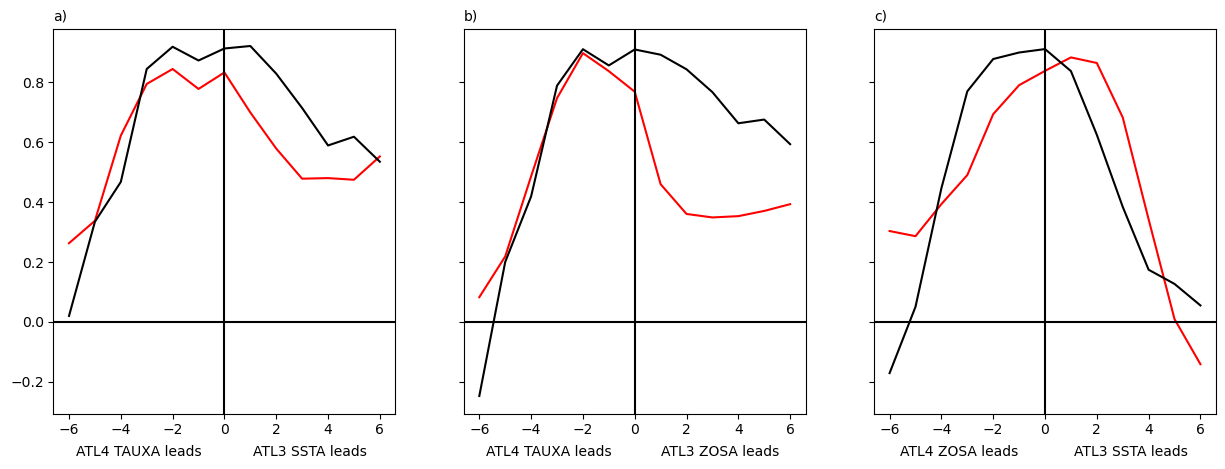

In [74]:
f,ax = plt.subplots(1,3,figsize=[15,5],sharey=True)
ftz=10
ax = ax.ravel()

ax[0].plot(lags,corr_uas_ssta_1,color='red')
ax[0].plot(lags,corr_uas_ssta_2,color='black')
ax[0].axvline(0,color='black')

ax[0].axhline(0,color='black')



ax[0].text(0.25,-0.1,'ATL4 TAUXA leads',fontsize=ftz,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax[0].transAxes)
ax[0].text(0.75,-0.1,'ATL3 SSTA leads',fontsize=ftz,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax[0].transAxes)




ax[1].plot(lags,corr_uas_zosa_1,color='red')
ax[1].plot(lags,corr_uas_zosa_2,color='black')
ax[1].axvline(0,color='black')

ax[1].axhline(0,color='black')



ax[1].text(0.25,-0.1,'ATL4 TAUXA leads',fontsize=ftz,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax[1].transAxes)
ax[1].text(0.75,-0.1,'ATL3 ZOSA leads',fontsize=ftz,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax[1].transAxes)




ax[2].plot(lags,corr_ssta_zosa_1,color='red')
ax[2].plot(lags,corr_ssta_zosa_2,color='black')
ax[2].axvline(0,color='black')

ax[2].axhline(0,color='black')



ax[2].text(0.25,-0.1,'ATL4 ZOSA leads',fontsize=ftz,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax[2].transAxes)
ax[2].text(0.75,-0.1,'ATL3 SSTA leads',fontsize=ftz,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax[2].transAxes)



ax[0].text(0,
         1.02, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.02, 'b)',transform=ax[1].transAxes,size=ftz)
ax[2].text(0,
         1.02, 'c)',transform=ax[2].transAxes,size=ftz)



plt.savefig('figures/figure_lead_lag_tauua_zosa_ssta.png',
             dpi = 300,
            bbox_inches='tight')

# Figures

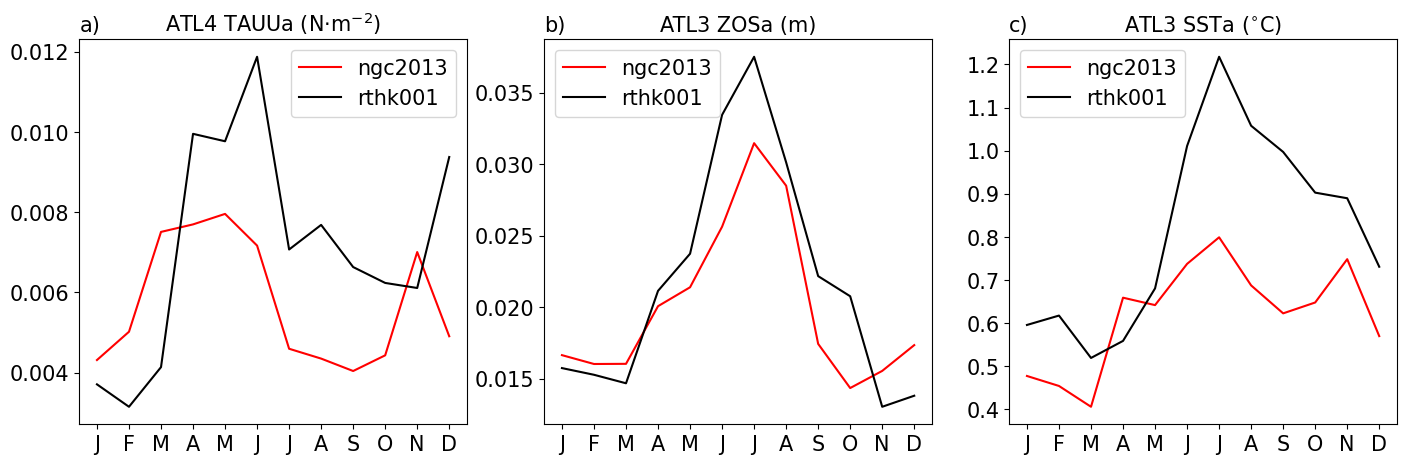

In [73]:
f,ax = plt.subplots(1,3,figsize=[17,5])
m = np.arange(0,12)
month = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D',]
ftz=15

ax=ax.ravel()



ax[0].plot(m,std_tauua_1,color='red',label='ngc2013')
ax[0].plot(m,std_tauua_2,color='black',label='rthk001')
ax[0].set_xticks(m)
ax[0].set_xticklabels(month, fontsize=ftz)
ax[0].set_title('ATL4 TAUUa (N$\cdot$m$^{-2}$)',fontsize=ftz)
ax[0].tick_params(labelsize=ftz)
ax[0].legend(fontsize=ftz)


ax[1].plot(m,std_zosa_1,color='red',label='ngc2013')
ax[1].plot(m,std_zosa_2,color='black',label='rthk001')
ax[1].set_xticks(m)
ax[1].set_xticklabels(month, fontsize=ftz)
ax[1].set_title('ATL3 ZOSa (m)',fontsize=ftz)
ax[1].tick_params(labelsize=ftz)
ax[1].legend(fontsize=ftz)


ax[2].plot(m,std_ssta_1,color='red',label='ngc2013')
ax[2].plot(m,std_ssta_2,color='black',label='rthk001')
ax[2].set_xticks(m)
ax[2].set_xticklabels(month, fontsize=ftz)
ax[2].set_title('ATL3 SSTa ($^{\circ}$C)',fontsize=ftz)
ax[2].tick_params(labelsize=ftz)
ax[2].legend(fontsize=ftz)





ax[0].text(0,
         1.02, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.02, 'b)',transform=ax[1].transAxes,size=ftz)
ax[2].text(0,
         1.02, 'c)',transform=ax[2].transAxes,size=ftz)


plt.savefig('figures/figure_seasonal_cycle_std_tauua_zosa_ssta.png',
             dpi = 300,
            bbox_inches='tight')

# Figure maps

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487

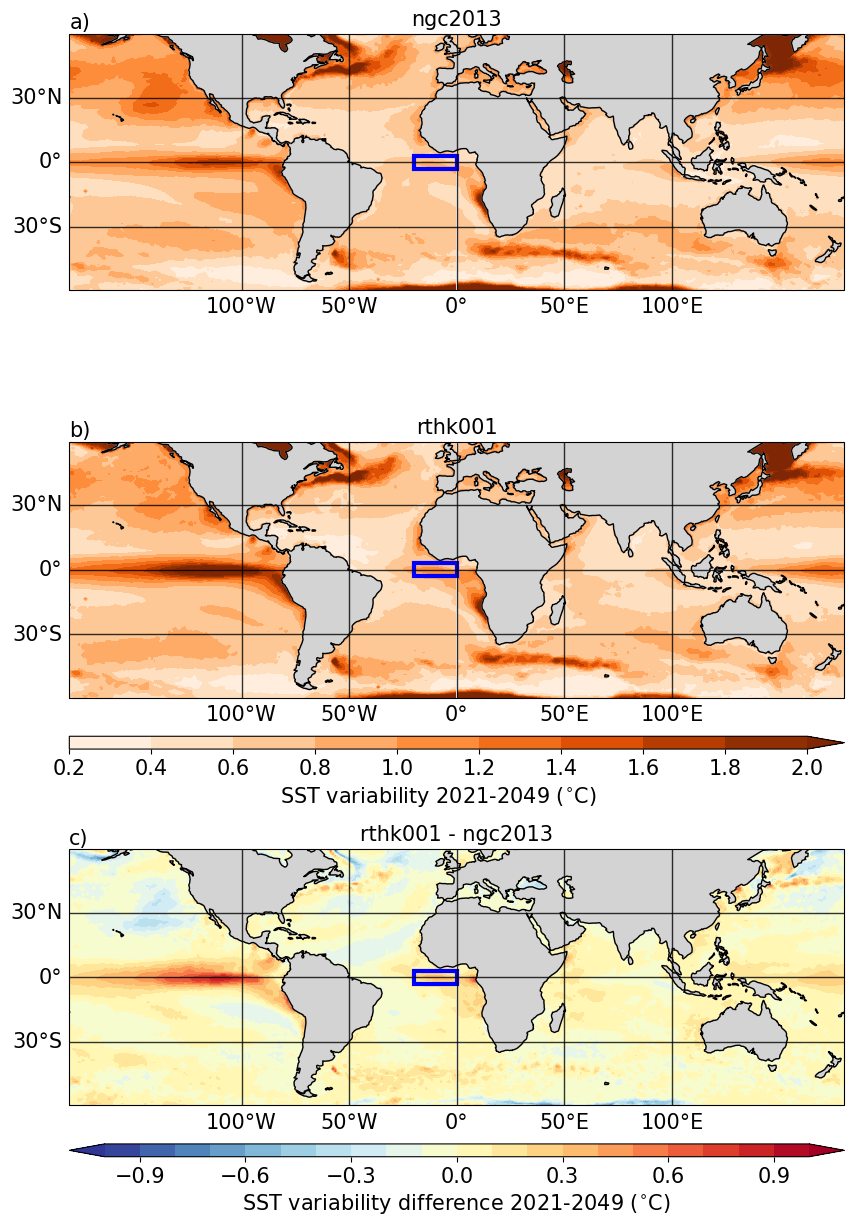

In [11]:
ftz=15


fig = plt.figure(figsize=[10, 15])
fig.patch.set_facecolor('white')
gs = gridspec.GridSpec(3, 1)

ax0  = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax1  = fig.add_subplot(gs[1, 0],projection=ccrs.PlateCarree())
ax2  = fig.add_subplot(gs[2, 0],projection=ccrs.PlateCarree())




plot_std_ssta(ax0,std_ssta_detrended_1)


p0=plot_std_ssta(ax1,std_ssta_detrended_2)
p2=plot_std_ssta_diff(ax2,std_ssta_detrended_2-std_ssta_detrended_1)

ax0.set_title('ngc2013',fontsize=ftz)
ax1.set_title('rthk001',fontsize=ftz)

ax2.set_title('rthk001 - ngc2013',fontsize=ftz)



cax0 = inset_axes(ax1,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.2, 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0,
                   )

cax2 = inset_axes(ax2,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.2, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )


cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'SST variability 2021-2049 ($^{\circ}$C)', size=ftz)


cbar = plt.colorbar(p2,cax2,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'SST variability difference 2021-2049 ($^{\circ}$C)', size=ftz)



ax0.text(0,
         1.02, 'a)',transform=ax0.transAxes,size=ftz)
ax1.text(0,
         1.02, 'b)',transform=ax1.transAxes,size=ftz)
ax2.text(0,
         1.02, 'c)',transform=ax2.transAxes,size=ftz)


plt.savefig('figures/figure_02_std_ssta_map.png',
             dpi = 300,
            bbox_inches='tight')